## Analyze A/B Test Results


## Table of Contents
- [Introduction](#intro)
- [Part I - Probability](#probability)
- [Part II - A/B Test](#ab_test)
- [Part III - Regression](#regression)


<a id='intro'></a>
### Introduction

A/B tests are very commonly performed by data analysts and data scientists.  It is important that you get some practice working with the difficulties of these 

For this project, you will be working to understand the results of an A/B test run by an e-commerce website.  Your goal is to work through this notebook to help the company understand if they should implement the new page, keep the old page, or perhaps run the experiment longer to make their decision.

**As you work through this notebook, follow along in the classroom and answer the corresponding quiz questions associated with each question.** The labels for each classroom concept are provided for each question.  This will assure you are on the right track as you work through the project, and you can feel more confident in your final submission meeting the criteria.  As a final check, assure you meet all the criteria on the [RUBRIC](https://review.udacity.com/#!/projects/37e27304-ad47-4eb0-a1ab-8c12f60e43d0/rubric).

<a id='probability'></a>
#### Part I - Probability

To get started, let's import our libraries.

In [130]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline
#We are setting the seed to assure you get the same answers on quizzes as we set up
random.seed(42)

`1.` Now, read in the `ab_data.csv` data. Store it in `df`.  **Use your dataframe to answer the questions in Quiz 1 of the classroom.**

a. Read in the dataset and take a look at the top few rows here:

In [131]:
df = pd.read_csv('ab_data.csv')

In [132]:
df.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


b. Use the below cell to find the number of rows in the dataset.

In [133]:
df.shape

(294478, 5)

c. The number of unique users in the dataset.

In [134]:
df.user_id.nunique()

290584

d. The proportion of users converted.

In [135]:
df.query('converted==1')['user_id'].nunique()/df.user_id.nunique()

0.12104245244060237

e. The number of times the `new_page` and `treatment` don't line up.

In [136]:
df.query("landing_page=='new_page' and group=='treatment'").shape[0]

145311

In [137]:
df.query("landing_page=='old_page' and group=='control'").shape[0]

145274

In [138]:
df.shape[0]-(df.query("landing_page=='new_page' and group=='treatment'").shape[0])-df.query("landing_page=='old_page' and group=='control'").shape[0]

3893

f. Do any of the rows have missing values?

In [216]:
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294478 entries, 0 to 294477
Data columns (total 5 columns):
user_id         294478 non-null int64
timestamp       294478 non-null object
group           294478 non-null object
landing_page    294478 non-null object
converted       294478 non-null int64
dtypes: int64(2), object(3)
memory usage: 11.2+ MB


In [217]:
df.isnull().any() #there is no missing values

user_id         False
timestamp       False
group           False
landing_page    False
converted       False
dtype: bool

`2.` For the rows where **treatment** is not aligned with **new_page** or **control** is not aligned with **old_page**, we cannot be sure if this row truly received the new or old page.  Use **Quiz 2** in the classroom to provide how we should handle these rows.  

a. Now use the answer to the quiz to create a new dataset that meets the specifications from the quiz.  Store your new dataframe in **df2**.

In [141]:
df_group1=df.query("landing_page=='old_page'and group=='control'")

In [142]:
df_group2=df.query("landing_page=='new_page'and group=='treatment'")

In [143]:
frames = [df_group1,df_group2]
df2=pd.concat(frames)



In [144]:
df2.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1
5,936923,2017-01-10 15:20:49.083499,control,old_page,0
7,719014,2017-01-17 01:48:29.539573,control,old_page,0


In [145]:
df2.shape

(290585, 5)

In [146]:
# Double Check all of the correct rows were removed - this should be 0
df2[((df2['group'] == 'treatment') == (df2['landing_page'] == 'new_page')) == False].shape[0]



0

`3.` Use **df2** and the cells below to answer questions for **Quiz3** in the classroom.

a. How many unique **user_id**s are in **df2**?

In [147]:
df2.user_id.nunique()

290584

b. There is one **user_id** repeated in **df2**.  What is it?

In [148]:
df2.groupby('user_id')['user_id'].count().sort_values(ascending=False).head(1)

user_id
773192    2
Name: user_id, dtype: int64

c. What is the row information for the repeat **user_id**? 

In [149]:
df2.query("user_id==773192")

,user_id,timestamp,group,landing_page,converted
1899,773192,2017-01-09 05:37:58.781806,treatment,new_page,0
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


d. Remove **one** of the rows with a duplicate **user_id**, but keep your dataframe as **df2**.

In [150]:
df2.drop(df.index[1899], inplace=True)

In [151]:
df2.shape

(290584, 5)

In [152]:
df2.groupby('user_id')['user_id'].count().sort_values(ascending=False).head(1)

user_id
945999    1
Name: user_id, dtype: int64

`4.` Use **df2** in the below cells to answer the quiz questions related to **Quiz 4** in the classroom.

a. What is the probability of an individual converting regardless of the page they receive?

In [153]:
df2.converted.mean()

0.11959708724499628

b. Given that an individual was in the `control` group, what is the probability they converted?

In [154]:
df2.query("group=='control'").converted.mean()

0.1203863045004612

c. Given that an individual was in the `treatment` group, what is the probability they converted?

In [155]:
df2.query("group=='treatment'").converted.mean()

0.11880806551510564

d. What is the probability that an individual received the new page?

In [156]:
df2.query("landing_page=='new_page'").shape[0]/df2.shape[0]

0.5000619442226688

e. Use the results in the previous two portions of this question to suggest if you think there is evidence that one page leads to more conversions?  Write your response below.

**Your answer goes here.**

- The probability that the control(old_page) group converted is 12.04%, which is approximately 0.16% higher than the treatment(new_page) group(11.88%). Therefore, I think there is evidence that the old page leads to more conversions.






<a id='ab_test'></a>
### Part II - A/B Test

Notice that because of the time stamp associated with each event, you could technically run a hypothesis test continuously as each observation was observed.  

However, then the hard question is do you stop as soon as one page is considered significantly better than another or does it need to happen consistently for a certain amount of time?  How long do you run to render a decision that neither page is better than another?  

These questions are the difficult parts associated with A/B tests in general.  


`1.` For now, consider you need to make the decision just based on all the data provided.  If you want to assume that the old page is better unless the new page proves to be definitely better at a Type I error rate of 5%, what should your null and alternative hypotheses be?  You can state your hypothesis in terms of words or in terms of **$p_{old}$** and **$p_{new}$**, which are the converted rates for the old and new pages.

**Answer:**

>**$H_{0}$**: **$p_{new}$**=<**$p_{old}$** 
>
>**$H_{1}$**: **$p_{new}$**>**$p_{old}$**

- Null hypothesis: The conversion probability of the old page is better than or equal to the new page's one.(The new page's conversion probability is no better, or even worse, than the old page's one) at a Type I error rate of 5%.
- Alternative hypothesis: The new page's conversion probability is better than the old page at a Type I error rate of 5%.





`2.` Assume under the null hypothesis, $p_{new}$ and $p_{old}$ both have "true" success rates equal to the **converted** success rate regardless of page - that is $p_{new}$ and $p_{old}$ are equal. Furthermore, assume they are equal to the **converted** rate in **ab_data.csv** regardless of the page. <br><br>

Use a sample size for each page equal to the ones in **ab_data.csv**.  <br><br>

Perform the sampling distribution for the difference in **converted** between the two pages over 10,000 iterations of calculating an estimate from the null.  <br><br>

Use the cells below to provide the necessary parts of this simulation.  If this doesn't make complete sense right now, don't worry - you are going to work through the problems below to complete this problem.  You can use **Quiz 5** in the classroom to make sure you are on the right track.<br><br>

a. What is the **convert rate** for $p_{new}$ under the null? 

In [157]:
#under the null, we assume there is no different between two groups. Therefore, we don't need to calculate the p in two groups.
p_new = df2.query("converted==1").user_id.nunique()/df2.user_id.nunique()
p_new

0.11959708724499628

b. What is the **convert rate** for $p_{old}$ under the null? <br><br>

In [158]:
#under the null, we assume there is no different between two groups. Therefore, we don't need to calculate the p in two groups.
p_old = df2.query("converted==1").user_id.nunique()/df2.user_id.nunique()
p_old




0.11959708724499628

c. What is $n_{new}$?

In [159]:
n_new = df2.query("landing_page=='new_page'").shape[0]
n_new

145310

d. What is $n_{old}$?

In [160]:
n_old = df2.query("landing_page=='old_page'").shape[0]
n_old

145274

e. Simulate $n_{new}$ transactions with a convert rate of $p_{new}$ under the null.  Store these $n_{new}$ 1's and 0's in **new_page_converted**.

In [161]:
new_page_converted = np.random.choice([0,1],size=n_new,p=[(1-p_new),p_new])

f. Simulate $n_{old}$ transactions with a convert rate of $p_{old}$ under the null.  Store these $n_{old}$ 1's and 0's in **old_page_converted**.

In [162]:
old_page_converted = np.random.choice([0,1],size=n_old,p=[(1-p_old),p_old])

g. Find $p_{new}$ - $p_{old}$ for your simulated values from part (e) and (f).

In [163]:
# compute the new p_new and p_old after simulation
p_new=new_page_converted.mean()
p_old=old_page_converted.mean()
p_new-p_old


-0.00011229134984389044

h. Simulate 10,000 $p_{new}$ - $p_{old}$ values using this same process similarly to the one you calculated in parts **a. through g.** above.  Store all 10,000 values in **p_diffs**.

In [164]:
p_diffs=[]
for _ in range(10000):
    new_page_converted = np.random.choice([0,1],size=n_new,p=[(1-p_new),p_new])
    old_page_converted = np.random.choice([0,1],size=n_old,p=[(1-p_old),p_old])
    diff = new_page_converted.mean()-old_page_converted.mean()
    p_diffs.append(diff)
    
    
    


i. Plot a histogram of the **p_diffs**.  Does this plot look like what you expected?  Use the matching problem in the classroom to assure you fully understand what was computed here.

In [165]:
p_diffs = np.array(p_diffs)

(array([  2.00000000e+00,   3.40000000e+01,   3.13000000e+02,
          1.38700000e+03,   3.18000000e+03,   3.30300000e+03,
          1.45900000e+03,   2.99000000e+02,   2.20000000e+01,
          1.00000000e+00]),
 array([-0.00564629, -0.00454157, -0.00343685, -0.00233212, -0.0012274 ,
        -0.00012268,  0.00098204,  0.00208676,  0.00319148,  0.0042962 ,
         0.00540093]),
 <a list of 10 Patch objects>)

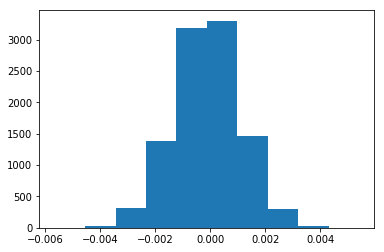

In [166]:
plt.hist(p_diffs)

j. What proportion of the **p_diffs** are greater than the actual difference observed in **ab_data.csv**?

In [167]:
null_vals = np.random.normal(0, p_diffs.std(), p_diffs.size)

(array([    5.,    54.,   419.,  1450.,  2927.,  2917.,  1707.,   455.,
           63.,     3.]),
 array([ -5.03361059e-03,  -4.03923527e-03,  -3.04485996e-03,
         -2.05048465e-03,  -1.05610934e-03,  -6.17340264e-05,
          9.32641286e-04,   1.92701660e-03,   2.92139191e-03,
          3.91576722e-03,   4.91014253e-03]),
 <a list of 10 Patch objects>)

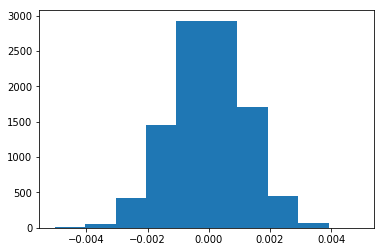

In [168]:
plt.hist(null_vals)

In [169]:
obs_diff = (df2.query("landing_page=='new_page'").converted.mean() - df2.query("landing_page=='old_page'").converted.mean())
obs_diff

-0.0015782389853555567

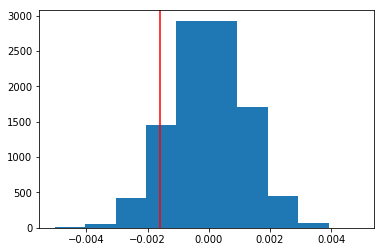

In [170]:
plt.hist(null_vals)
plt.axvline(x=obs_diff, color='red')


In [171]:
(p_diffs > obs_diff).mean()

0.88639999999999997

k. In words, explain what you just computed in part **j.**.  What is this value called in scientific studies?  What does this value mean in terms of whether or not there is a difference between the new and old pages?

**Answer:**

The value I just computes is called the p-value. P-value is the probability of observing the data or something more extreme in favor of the alternative given the null hypothesis is true. Since the p-value is > alpha (0.05) here, we fail to reject the null hypothesis. In other words, the conversion probability of the old page is better than or equal to the new page's one.




l. We could also use a built-in to achieve similar results.  Though using the built-in might be easier to code, the above portions are a walkthrough of the ideas that are critical to correctly thinking about statistical significance. Fill in the below to calculate the number of conversions for each page, as well as the number of individuals who received each page. Let `n_old` and `n_new` refer the the number of rows associated with the old page and new pages, respectively.

In [172]:
import statsmodels.api as sm

convert_old = df2.query("landing_page=='old_page'").converted.mean()
convert_new = df2.query("landing_page=='new_page'").converted.mean()
n_old = df2.query("landing_page=='old_page'").shape[0]
n_new = df2.query("landing_page=='new_page'").shape[0]

print(convert_old)
print(convert_new)
print(n_old)
print(n_new)



0.1203863045
0.118808065515
145274
145310


m. Now use `stats.proportions_ztest` to compute your test statistic and p-value.  [Here](http://knowledgetack.com/python/statsmodels/proportions_ztest/) is a helpful link on using the built in.

In [173]:
convert_old_ct = df2.query("group=='control'and converted==1")['user_id'].count()
print(convert_old_ct)



17489


In [174]:
convert_new_ct = df2.query("group=='treatment'and converted==1")['user_id'].count()
print(convert_new_ct)




17264


In [176]:
z_score, p_value = sm.stats.proportions_ztest([17489, 17264], [145274, 145310], alternative='smaller')
z_score, p_value

#http://www.statsmodels.org/dev/generated/statsmodels.stats.proportion.proportions_ztest.html



(1.3109241984234394, 0.90505831275902449)

n. What do the z-score and p-value you computed in the previous question mean for the conversion rates of the old and new pages?  Do they agree with the findings in parts **j.** and **k.**?

**Answer:**

Z scores are measures of standard deviation. Both z scores and p-values are associated with the standard normal distribution. Here we can see that the p-value agrees with the findings in j. and k., meaning that we fail to reject the null hypothesis and the conversion rate of the old page is better than or equal to the new page's one.

<a id='regression'></a>
### Part III - A regression approach

`1.` In this final part, you will see that the result you acheived in the previous A/B test can also be acheived by performing regression.<br><br>

a. Since each row is either a conversion or no conversion, what type of regression should you be performing in this case?

**Answer:**

Since the result we want to predict is a categorial one, we should use the logistic regression.

b. The goal is to use **statsmodels** to fit the regression model you specified in part **a.** to see if there is a significant difference in conversion based on which page a customer receives.  However, you first need to create a colun for the intercept, and create a dummy variable column for which page each user received.  Add an **intercept** column, as well as an **ab_page** column, which is 1 when an individual receives the **treatment** and 0 if **control**.

In [177]:
df2['intercept'] = 1
df2[['control','treatment']]=pd.get_dummies(df2['group'])



In [178]:
df2.head()

,user_id,timestamp,group,landing_page,converted,intercept,control,treatment
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,1,1,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,1,1,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,1,1,0
5,936923,2017-01-10 15:20:49.083499,control,old_page,0,1,1,0
7,719014,2017-01-17 01:48:29.539573,control,old_page,0,1,1,0


In [179]:
df2.drop('control',axis=1,inplace=True)

In [180]:
df2.head()

,user_id,timestamp,group,landing_page,converted,intercept,treatment
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,1,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,1,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,1,0
5,936923,2017-01-10 15:20:49.083499,control,old_page,0,1,0
7,719014,2017-01-17 01:48:29.539573,control,old_page,0,1,0


c. Use **statsmodels** to import your regression model.  Instantiate the model, and fit the model using the two columns you created in part **b.** to predict whether or not an individual converts.

In [181]:
import statsmodels.api as sm

logit_mod = sm.Logit(df2['converted'], df2[['intercept','treatment']])
results = logit_mod.fit()
results.summary()






Optimization terminated successfully.
         Current function value: 0.366118
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290582
Method:                           MLE   Df Model:                            1
Date:                Tue, 18 Sep 2018   Pseudo R-squ.:               8.077e-06
Time:                        13:26:40   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
                                        LLR p-value:                    0.1899
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9888      0.008   -246.669      0.000      -2.005      -1.973
treatment     -0.0150      0.011     -1.311      0.190      -0.037       0.007
==============================================================================
"""

d. Provide the summary of your model below, and use it as necessary to answer the following questions.

**Answer:**

In this model, the coefficient of the intercept is -1.9888 with a p-value of 0.000, and the coefficient of the treatment is -0.0150 with a p-value of 0.190.

e. What is the p-value associated with **ab_page**? Why does it differ from the value you found in the **Part II**?<br><br>  **Hint**: What are the null and alternative hypotheses associated with your regression model, and how do they compare to the null and alternative hypotheses in the **Part II**?

**Answer:**

The p-value here is 0.190 which is way smaller than what we found in part 2. Also, since it is larger than the alpha (0.05) level, it did not show that the treatment(ab page) is statistically significant in this model. The regression model here means that we want to know if ab page is assocaited with the change of converstion rate. Therefore, the null hypothesis here is: the conversion rate of the old page is the same as the new page's one. The alternative hypothesis is: the conversion rate of the new page is different from the old page's one. In conclusion, the regression model here is a two-sided model and in part 2, we were doing a one-sided analysis.

f. Now, you are considering other things that might influence whether or not an individual converts.  Discuss why it is a good idea to consider other factors to add into your regression model.  Are there any disadvantages to adding additional terms into your regression model?

**Answer:**

It is a good idea to consider other factors to add into the regression model, because:
- some of the independent variables that we did not consider in the current model may correlate to the current independent variables, which means this model may have multicollinearity problem and we did not know. Therefore, adding more independent variables will help us better understand the replationship between the independnet variables and the dependent variable, minimizing the multicollinearity problem. 
- Since this is a A/B testing, change aversion bias might exist. Including more independent vairables may help us to decrease the risk of this bias.
- Inlcuding more independnet vairables will help us to decrease the risk of Simpson's paradox, which means a trend appears in several different groups of data but disappears or reverses when these groups are combined.


Adding additional terms into the regression model may have disadvantages too, such as overfitting. Overfitting means the regression model becomes tailored to fit the quirks and random noise in the specific sample rather than reflecting the overall population. (reference: http://blog.minitab.com/blog/adventures-in-statistics-2/the-danger-of-overfitting-regression-models)




g. Now along with testing if the conversion rate changes for different pages, also add an effect based on which country a user lives. You will need to read in the **countries.csv** dataset and merge together your datasets on the approporiate rows.  [Here](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.join.html) are the docs for joining tables. 

Does it appear that country had an impact on conversion?  Don't forget to create dummy variables for these country columns - **Hint: You will need two columns for the three dummy varaibles.** Provide the statistical output as well as a written response to answer this question.

In [183]:
df_country = pd.read_csv('countries.csv')
df_country.head()

,user_id,country
0,834778,UK
1,928468,US
2,822059,UK
3,711597,UK
4,710616,UK


In [184]:
df_country.shape

(290584, 2)

In [193]:
df_new=df2.join(df_country.set_index('user_id'),on='user_id') #join the country colum

In [194]:
df_new.head()

,user_id,timestamp,group,landing_page,converted,intercept,treatment,country
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,1,0,US
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,1,0,US
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,1,0,US
5,936923,2017-01-10 15:20:49.083499,control,old_page,0,1,0,US
7,719014,2017-01-17 01:48:29.539573,control,old_page,0,1,0,US


In [196]:
df_new.shape

(290584, 8)

In [197]:
df_new.groupby('country')['user_id'].count() #see the distribution of three countries

country
CA     14499
UK     72466
US    203619
Name: user_id, dtype: int64

In [198]:
df_new[['CA','UK','US']]= pd.get_dummies(df_new['country']) #create dummy variables for three countries

In [199]:
df_new.head()

,user_id,timestamp,group,landing_page,converted,intercept,treatment,country,CA,UK,US
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,1,0,US,0,0,1
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,1,0,US,0,0,1
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,1,0,US,0,0,1
5,936923,2017-01-10 15:20:49.083499,control,old_page,0,1,0,US,0,0,1
7,719014,2017-01-17 01:48:29.539573,control,old_page,0,1,0,US,0,0,1


In [200]:
df_new = df_new.drop('CA',axis=1) #CA will be the baseline

In [202]:
df_new.head()

,user_id,timestamp,group,landing_page,converted,intercept,treatment,country,UK,US
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,1,0,US,0,1
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,1,0,US,0,1
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,1,0,US,0,1
5,936923,2017-01-10 15:20:49.083499,control,old_page,0,1,0,US,0,1
7,719014,2017-01-17 01:48:29.539573,control,old_page,0,1,0,US,0,1


In [215]:
logit_mod2 = sm.Logit(df_new['converted'],df_new[['intercept','treatment','UK','US']])
results2 = logit_mod2.fit()
results2.summary()


Optimization terminated successfully.
         Current function value: 0.366113
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290580
Method:                           MLE   Df Model:                            3
Date:                Tue, 18 Sep 2018   Pseudo R-squ.:               2.323e-05
Time:                        14:40:48   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
                                        LLR p-value:                    0.1760
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -2.0300      0.027    -76.249      0.000      -2.082      -1.978
treatment     -0.0149      0.011     -1.307      0.191      -0.037       0.007
UK             0.0506      0.028      1.784      0.074      -0.005       0.106
US             0.0408      0.027      1.516      0.130      -0.012       0.093
==============================================================================
"""

**Findings from above:**
- The p-values of UK and US are all greater than the alpha level(0.05), which means that they are not statistially significant and it appears that country does not have an impact on conversion.

h. Though you have now looked at the individual factors of country and page on conversion, we would now like to look at an interaction between page and country to see if there significant effects on conversion.  Create the necessary additional columns, and fit the new model.  

Provide the summary results, and your conclusions based on the results.

In [208]:
#By muliplying two independent variables, we can find there interations
df_new['page_US']=df_new['treatment']*df_new['US'] 

In [209]:
df_new['page_UK']=df_new['treatment']*df_new['UK']

In [210]:
df_new.head()

,user_id,timestamp,group,landing_page,converted,intercept,treatment,country,UK,US,page_country,page_UK,page_US
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,1,0,US,0,1,0,0,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,1,0,US,0,1,0,0,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,1,0,US,0,1,0,0,0
5,936923,2017-01-10 15:20:49.083499,control,old_page,0,1,0,US,0,1,0,0,0
7,719014,2017-01-17 01:48:29.539573,control,old_page,0,1,0,US,0,1,0,0,0


In [214]:
logit_mod3 = sm.Logit(df_new['converted'], df_new[['intercept','treatment','UK','US','page_UK','page_US']])
results3 = logit_mod3 .fit()
results3.summary()

Optimization terminated successfully.
         Current function value: 0.366109
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290578
Method:                           MLE   Df Model:                            5
Date:                Tue, 18 Sep 2018   Pseudo R-squ.:               3.482e-05
Time:                        14:40:20   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
                                        LLR p-value:                    0.1920
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -2.0040      0.036    -55.008      0.000      -2.075      -1.933
treatment     -0.0674      0.052     -1.297      0.195      -0.169       0.034
UK             0.0118      0.040      0.296      0.767      -0.066       0.090
US             0.0175      0.038      0.465      0.642      -0.056       0.091
page_UK        0.0783      0.057      1.378      0.168      -0.033       0.190
page_US        0.0469      0.054      0.872      0.383      -0.059       0.152
==============================================================================
"""

**Findings from above:**
- The cofficients of the treatment, UK, and US have changed but their p-values are still larger than the alpha(0.05), meaning that they do not have an impact on the conversion rate.
- Looking at the interactions between page and country(page_UK, page_US), there is no significant effects on conversion since the p-values of those two variables(0.168, 0.383) are larger than alpha(0.05). 

## Directions to Submit

> Before you submit your project, you need to create a .html or .pdf version of this notebook in the workspace here. To do that, run the code cell below. If it worked correctly, you should get a return code of 0, and you should see the generated .html file in the workspace directory (click on the orange Jupyter icon in the upper left).

> Alternatively, you can download this report as .html via the **File** > **Download as** submenu, and then manually upload it into the workspace directory by clicking on the orange Jupyter icon in the upper left, then using the Upload button.

> Once you've done this, you can submit your project by clicking on the "Submit Project" button in the lower right here. This will create and submit a zip file with this .ipynb doc and the .html or .pdf version you created. Congratulations!

In [218]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Analyze_ab_test_results_notebook.ipynb'])

0